In [3]:
train=pd.read_csv("/Users/bruce/Desktop/datasets/human/train.csv")
test=pd.read_csv("/Users/bruce/Desktop/datasets/human/test.csv")

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [4]:
train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
train.shape

(7352, 563)

In [6]:
test.shape

(2947, 563)

In [46]:
X_train=train.drop("Activity",axis=1)
Y_train=train["Activity"].values
X_test=test.drop("Activity",axis=1)
Y_test=test["Activity"].values

In [47]:
np.unique(Y_train)

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [35]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

encoder.fit(Y_train)
Y_train = encoder.transform(Y_train)

encoder.fit(Y_test)
Y_test = encoder.transform(Y_test)

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [13]:
model=RandomForestClassifier(n_estimators=100)
kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
results=["Ranom Forest",cv_result.mean(),cv_result.std()]

print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[0] , results[1] * 100, results[2] * 100))

Ranom Forest         91.05 (+/-) 4.40 


In [14]:
from sklearn import metrics
from matplotlib import pylab

final_model = RandomForestClassifier(n_estimators=200,max_features=None,bootstrap=True,oob_score=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[537   0   0   0   0   0]
 [  0 392  99   0   0   0]
 [  0 107 425   0   0   0]
 [  0   0   0 477  11   8]
 [  0   0   0  54 280  86]
 [  0   0   0  42   6 423]]
85.9857482185
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       537
          1       0.79      0.80      0.79       491
          2       0.81      0.80      0.80       532
          3       0.83      0.96      0.89       496
          4       0.94      0.67      0.78       420
          5       0.82      0.90      0.86       471

avg / total       0.86      0.86      0.86      2947



In [15]:
final_model = RandomForestClassifier(n_estimators=1,max_features=None,bootstrap=False,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[537   0   0   0   0   0]
 [  0 400  91   0   0   0]
 [  0 113 419   0   0   0]
 [  0   0   0 470  10  16]
 [  0   0   0  49 266 105]
 [  0   0   0  86   6 379]]
83.8479809976
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       537
          1       0.78      0.81      0.80       491
          2       0.82      0.79      0.80       532
          3       0.78      0.95      0.85       496
          4       0.94      0.63      0.76       420
          5       0.76      0.80      0.78       471

avg / total       0.85      0.84      0.84      2947



In [16]:
final_model = RandomForestClassifier(n_estimators=200,max_features='sqrt',bootstrap=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[537   0   0   0   0   0]
 [  0 391 100   0   0   0]
 [  0  43 489   0   0   0]
 [  0   0   0 484  10   2]
 [  0   0   0  62 305  53]
 [  0   0   0  42   6 423]]
89.2093654564
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       537
          1       0.90      0.80      0.85       491
          2       0.83      0.92      0.87       532
          3       0.82      0.98      0.89       496
          4       0.95      0.73      0.82       420
          5       0.88      0.90      0.89       471

avg / total       0.90      0.89      0.89      2947



In [21]:
from xgboost import XGBClassifier

final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=0.5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[537   0   0   0   0   0]
 [  0 432  57   0   0   2]
 [  0  28 504   0   0   0]
 [  0   0   0 487   4   5]
 [  0   0   0   7 380  33]
 [  0   0   0  34   5 432]]
94.0617577197
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       537
          1       0.94      0.88      0.91       491
          2       0.90      0.95      0.92       532
          3       0.92      0.98      0.95       496
          4       0.98      0.90      0.94       420
          5       0.92      0.92      0.92       471

avg / total       0.94      0.94      0.94      2947



In [20]:
from xgboost import XGBClassifier

final_model = XGBClassifier(n_estimators=1,num_boost_round=1,max_depth=5,subsample=1,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[537   0   0   0   0   0]
 [  0 379 108   0   0   4]
 [  0  83 444   0   1   4]
 [  0   2   0 453  26  15]
 [  0   5   0  40 340  35]
 [  0   9   0  80  30 352]]
85.0016966407
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       537
          1       0.79      0.77      0.78       491
          2       0.80      0.83      0.82       532
          3       0.79      0.91      0.85       496
          4       0.86      0.81      0.83       420
          5       0.86      0.75      0.80       471

avg / total       0.85      0.85      0.85      2947



In [19]:
from xgboost import XGBClassifier

final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[537   0   0   0   0   0]
 [  0 421  68   0   0   2]
 [  0  29 503   0   0   0]
 [  0   0   0 488   4   4]
 [  0   0   0   8 382  30]
 [  0   0   0  29   5 437]]
93.9260264676
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       537
          1       0.94      0.86      0.89       491
          2       0.88      0.95      0.91       532
          3       0.93      0.98      0.96       496
          4       0.98      0.91      0.94       420
          5       0.92      0.93      0.93       471

avg / total       0.94      0.94      0.94      2947



In [6]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.layers import Dense, Activation, Dropout, Input
from keras import optimizers
history=History()

Using Theano backend.


In [25]:
m = Sequential()
m.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(len(np.unique(Y_train)), activation='softmax'))
    
m.compile(
    optimizer=optimizers.adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
hist=m.fit(
    # Feature matrix
    X_train.values, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=32
)

Train on 6616 samples, validate on 736 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 1.62317, saving model to best.model
0s - loss: 1.9051 - acc: 0.2030 - val_loss: 1.6232 - val_acc: 0.3492
Epoch 2/200
Epoch 00001: val_loss improved from 1.62317 to 1.21547, saving model to best.model
0s - loss: 1.5445 - acc: 0.3049 - val_loss: 1.2155 - val_acc: 0.3546
Epoch 3/200
Epoch 00002: val_loss improved from 1.21547 to 1.12036, saving model to best.model
0s - loss: 1.2638 - acc: 0.3420 - val_loss: 1.1204 - val_acc: 0.3750
Epoch 4/200
Epoch 00003: val_loss improved from 1.12036 to 1.09218, saving model to best.model
0s - loss: 1.1921 - acc: 0.3543 - val_loss: 1.0922 - val_acc: 0.4049
Epoch 5/200
Epoch 00004: val_loss improved from 1.09218 to 1.05918, saving model to best.model
0s - loss: 1.1523 - acc: 0.3774 - val_loss: 1.0592 - val_acc: 0.5394
Epoch 6/200
Epoch 00005: val_loss improved from 1.05918 to 0.98676, saving model to best.model
0s - loss: 1.1044 - acc: 0.4141 - val_loss

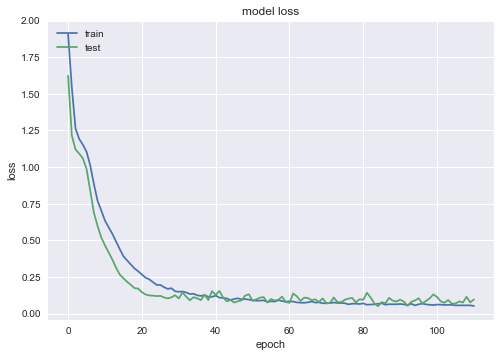

In [27]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
m.load_weights("best.model")

In [29]:
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in m.predict(X_test.values).argmax(axis=1)]

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[526   0   0   0   0  11]
 [  0 385 104   0   0   2]
 [  0  10 522   0   0   0]
 [  0   0   0 474  19   3]
 [  0   0   0   9 384  27]
 [  0   0   0  19  12 440]]
92.6705123855
             precision    recall  f1-score   support

          0       1.00      0.98      0.99       537
          1       0.97      0.78      0.87       491
          2       0.83      0.98      0.90       532
          3       0.94      0.96      0.95       496
          4       0.93      0.91      0.92       420
          5       0.91      0.93      0.92       471

avg / total       0.93      0.93      0.93      2947

